<a href="https://colab.research.google.com/github/pr1729p/deep_learning/blob/main/name_gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inLine

In [2]:
words = open("names.txt",'r').read().splitlines()

In [3]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
len(words)

32033

In [6]:
alphabet = sorted(list(set(''.join(words))))
alphabet

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [9]:
char_to_int = {c:i+1 for i,c in enumerate(alphabet)}
char_to_int['.'] = 0
int_to_char = {i:c for c,i in char_to_int.items()}
print(char_to_int)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [16]:
block_size = 3
X,Y = [],[]
for i in words[:5]:
  print(i)
  context = [0] * block_size
  for p in i +'.':
    idx = char_to_int[p]
    X.append(context)
    Y.append(idx)
    print(''.join(int_to_char[c] for c in context), '--->',p )
    context = context[1:] + [idx]

X = torch.tensor(X)
Y = torch.tensor(Y)


emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [17]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [19]:
Tb = torch.randn((27,2))
Tb

tensor([[-0.2078,  0.4918],
        [-1.1517,  0.0263],
        [-0.7879,  1.0851],
        [ 1.8469, -0.2956],
        [-1.1877, -0.4599],
        [ 0.6413, -0.1286],
        [ 0.4222, -0.5003],
        [ 0.6790, -1.0597],
        [-1.2616,  0.2579],
        [ 0.8038,  1.0480],
        [-1.6057, -1.1201],
        [ 1.0990,  0.7600],
        [-0.9482,  0.2679],
        [ 0.0119,  0.3816],
        [-0.8224,  0.4019],
        [-0.6526,  2.1497],
        [-0.5010,  0.0587],
        [ 0.1932, -0.0388],
        [ 0.1950,  1.4597],
        [-0.7248,  0.3385],
        [-0.4189, -0.7562],
        [ 1.4100, -2.6846],
        [-0.9765,  1.1767],
        [-1.2545, -0.2361],
        [-1.0659,  0.0832],
        [ 2.0666,  0.1501],
        [-1.8274,  1.0605]])

In [22]:
Tb[5]

tensor([ 0.6413, -0.1286])

In [20]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [23]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ Tb
# same as above

tensor([ 0.6413, -0.1286])

In [24]:
Tb[[5,6,7]]
#indexing over a list

tensor([[ 0.6413, -0.1286],
        [ 0.4222, -0.5003],
        [ 0.6790, -1.0597]])

In [25]:
Tb[torch.tensor([5,6,7])]
#indexing over a tensor

tensor([[ 0.6413, -0.1286],
        [ 0.4222, -0.5003],
        [ 0.6790, -1.0597]])

In [28]:
Tb[X].shape

torch.Size([32, 3, 2])

In [32]:
Tb[0]

tensor([-0.2078,  0.4918])

In [29]:
Tb[X]

tensor([[[-0.2078,  0.4918],
         [-0.2078,  0.4918],
         [-0.2078,  0.4918]],

        [[-0.2078,  0.4918],
         [-0.2078,  0.4918],
         [ 0.6413, -0.1286]],

        [[-0.2078,  0.4918],
         [ 0.6413, -0.1286],
         [ 0.0119,  0.3816]],

        [[ 0.6413, -0.1286],
         [ 0.0119,  0.3816],
         [ 0.0119,  0.3816]],

        [[ 0.0119,  0.3816],
         [ 0.0119,  0.3816],
         [-1.1517,  0.0263]],

        [[-0.2078,  0.4918],
         [-0.2078,  0.4918],
         [-0.2078,  0.4918]],

        [[-0.2078,  0.4918],
         [-0.2078,  0.4918],
         [-0.6526,  2.1497]],

        [[-0.2078,  0.4918],
         [-0.6526,  2.1497],
         [-0.9482,  0.2679]],

        [[-0.6526,  2.1497],
         [-0.9482,  0.2679],
         [ 0.8038,  1.0480]],

        [[-0.9482,  0.2679],
         [ 0.8038,  1.0480],
         [-0.9765,  1.1767]],

        [[ 0.8038,  1.0480],
         [-0.9765,  1.1767],
         [ 0.8038,  1.0480]],

        [[-0.9765,  1

In [33]:
X[10,2]
#integer at the location 10,2


tensor(9)

In [34]:
#its embedding is
Tb[X][10,2]


tensor([0.8038, 1.0480])

In [35]:
#is same as embedidng of 9
Tb[9]

tensor([0.8038, 1.0480])

In [36]:
embd = Tb[X]
embd.shape

torch.Size([32, 3, 2])

In [38]:
Wgt = torch.randn((6,100))
bias = torch.randn((100))

In [40]:
#embd @ Wgt +bias
#error due to incorrect order of matrix multiplication

In [44]:
torch.cat([embd[:,0,:], embd[:,1,:],embd[:,2,:]],1).shape

torch.Size([32, 6])

In [54]:
#torch.unbind(embd,1)
##removes a dimension and gives tuples

In [46]:
torch.cat(torch.unbind(embd,1),1).shape

torch.Size([32, 6])

In [48]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [50]:
a.shape

torch.Size([10])

In [51]:
a.view(2,5)
#changes the dimension--view

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [52]:
a.view(2,5,1)

tensor([[[0],
         [1],
         [2],
         [3],
         [4]],

        [[5],
         [6],
         [7],
         [8],
         [9]]])

In [53]:
embd.shape

torch.Size([32, 3, 2])

In [55]:
th = torch.tanh(embd.view(-1,6) @ Wgt + bias)
th

tensor([[ 0.7951,  0.3151,  0.6817,  ..., -0.8643,  0.9496, -0.9908],
        [ 0.9727,  0.8788,  0.9182,  ..., -0.8000,  0.8364, -0.9768],
        [-0.6649, -0.6090,  0.5293,  ..., -0.0512,  0.6771, -0.9955],
        ...,
        [ 0.6852, -0.9991,  1.0000,  ..., -0.9897,  0.9781, -0.9999],
        [ 0.9994,  0.6556, -0.1019,  ..., -0.9998,  0.9835, -0.9951],
        [-0.9971,  0.0938, -0.4701,  ...,  0.6577,  0.4718, -0.9997]])

In [56]:
th.shape

torch.Size([32, 100])

In [57]:
Wgt_2 = torch.randn((100,27))
bias_2 = torch.randn(27)

In [58]:
logits = th @ Wgt_2 + bias_2
logits.shape

torch.Size([32, 27])

In [59]:
counts = logits.exp()
prob = counts / counts.sum(1,keepdims = True)
prob.shape

torch.Size([32, 27])

In [62]:
prob[torch.arange(32),Y]

tensor([2.0531e-13, 2.3216e-03, 3.0763e-01, 2.7190e-10, 1.3010e-14, 1.7824e-06,
        2.2245e-02, 1.2941e-07, 6.1143e-11, 1.8951e-07, 1.1615e-12, 3.6213e-13,
        2.6854e-12, 4.6454e-03, 2.6223e-11, 3.8177e-21, 3.9192e-06, 1.4130e-07,
        1.0504e-14, 7.0974e-03, 2.1615e-16, 1.6730e-09, 2.2434e-06, 2.0739e-12,
        3.4061e-19, 3.3327e-08, 5.8153e-04, 1.3958e-06, 6.3565e-10, 5.1286e-04,
        4.4355e-10, 7.1805e-18])

In [61]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [63]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(20.4331)

In [63]:
-----------

In [64]:
g = torch.Generator().manual_seed(2147483647)
Tb = torch.rand((27,2), generator = g)
Wgt_1 = torch.randn((6,100),generator = g )
bias_1 = torch.randn((100), generator = g)
Wgt_2 = torch.randn((100,27), generator = g)
bias_2 = torch.randn((27), generator = g)
parameters = [Tb,Wgt_1,bias_1,Wgt_2,bias_2]

In [75]:
for p in parameters:
  p.requires_grad = True

In [65]:
sum(p.nelement() for p in parameters)

3481

In [67]:
embd = Tb[X]
th = torch.tanh(embd.view(-1,6) @ Wgt_1 + bias_1)
logits = th @ Wgt_2 + bias_2
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)
loss = - probs[torch.arange(32), Y].log().mean()
loss

tensor(10.1065)

In [68]:
F.cross_entropy(logits, Y)

tensor(10.1065)

In [ ]:
--------

In [76]:
g = torch.Generator().manual_seed(2147483647)
Tb = torch.rand((27,2), generator = g)
Wgt_1 = torch.randn((6,100),generator = g )
bias_1 = torch.randn((100), generator = g)
Wgt_2 = torch.randn((100,27), generator = g)
bias_2 = torch.randn((27), generator = g)
parameters = [Tb,Wgt_1,bias_1,Wgt_2,bias_2]

In [77]:
for p in parameters:
  p.requires_grad = True

In [80]:
# forward pass
for _ in range(1000):
  embd = Tb[X]
  th = torch.tanh(embd.view(-1,6) @ Wgt_1 + bias_1)
  logits = th @ Wgt_2 + bias_2
  loss = F.cross_entropy(logits, Y)
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  for p in parameters:
    p.data += -0.1 * p.grad
print(loss.item())


0.2564482092857361


In [84]:
logits.shape

torch.Size([32, 27])

In [81]:
logits.max(1)

torch.return_types.max(
values=tensor([ 9.3593, 16.6461, 16.2554, 19.0919, 18.3166,  9.3593, 17.2085, 17.5296,
        16.2622, 13.6635, 17.9833, 13.4290,  9.3593, 12.3627, 22.5362, 18.8569,
         9.3593, 11.4206, 18.4858, 17.7209, 21.3195, 16.6359, 21.2524, 17.8828,
        13.9782,  9.3593, 15.1187, 16.9584, 15.2897, 12.7398, 14.9170, 15.1647],
       grad_fn=<MaxBackward0>),
indices=tensor([19, 13, 13,  1,  0, 19, 12,  9, 22,  9,  1,  0, 19, 22,  1,  0, 19, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]))

In [ ]:
---- full code

In [105]:
block_size = 3
X,Y = [],[]
for i in words:
  #print(i)
  context = [0] * block_size
  for p in i +'.':
    idx = char_to_int[p]
    X.append(context)
    Y.append(idx)
    #print(''.join(int_to_char[c] for c in context), '--->',p )
    context = context[1:] + [idx]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [106]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [107]:
g = torch.Generator().manual_seed(2147483647)
Tb = torch.rand((27,2), generator = g)
Wgt_1 = torch.randn((6,100),generator = g )
bias_1 = torch.randn((100), generator = g)
Wgt_2 = torch.randn((100,27), generator = g)
bias_2 = torch.randn((27), generator = g)
parameters = [Tb,Wgt_1,bias_1,Wgt_2,bias_2]

In [108]:
for p in parameters:
  p.requires_grad = True

In [109]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre


In [110]:
learning_rate = []
loss_i = []

# forward pass
for i in range(1000):
  idx = torch.randint(0, X.shape[0],(32,))
  embd = Tb[X[idx]]
  th = torch.tanh(embd.view(-1,6) @ Wgt_1 + bias_1)
  logits = th @ Wgt_2 + bias_2
  loss = F.cross_entropy(logits, Y[idx])
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  lr = lrs[i]
  for p in parameters:
    p.data += -lr * p.grad
  learning_rate.append(lr)
  loss_i.append(loss.item())

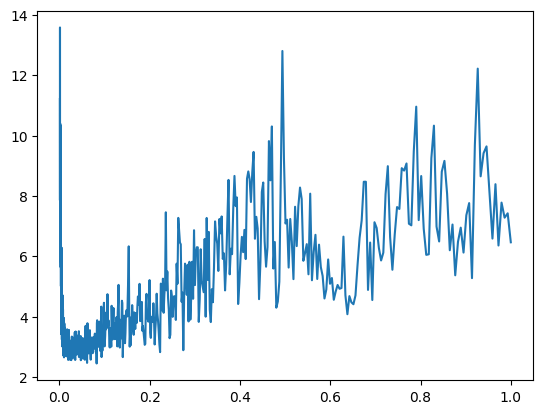

In [111]:
plt.plot(learning_rate,loss_i)

In [102]:
embd = Tb[X]
th = torch.tanh(embd.view(-1,6) @ Wgt_1 + bias_1)
logits = th @ Wgt_2 + bias_2
loss = F.cross_entropy(logits, Y)
loss

tensor(2.4494, grad_fn=<NllLossBackward0>)

In [ ]:
----

In [114]:
def dataset(words):
  block_size = 3
  X,Y = [], []
  for word in words:
    context = [0] * block_size
    for char in word + '.':
      idx = char_to_int[char]
      X.append(context)
      Y.append(idx)
      context = context[1:] + [idx]
  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X,Y


import random
random.seed(5)

num1 = int(0.8* len(words))
num2 = int(0.9* len(words))

X_train, Y_train = dataset(words[:num1])
X_val, Y_val = dataset(words[num1:num2])
X_test, Y_test = dataset(words[num2:])



torch.Size([182778, 3]) torch.Size([182778])
torch.Size([22633, 3]) torch.Size([22633])
torch.Size([22735, 3]) torch.Size([22735])


In [115]:
g = torch.Generator().manual_seed(2147483647)
Tb = torch.rand((27,2), generator = g)
Wgt_1 = torch.randn((6,100),generator = g )
bias_1 = torch.randn((100), generator = g)
Wgt_2 = torch.randn((100,27), generator = g)
bias_2 = torch.randn((27), generator = g)
parameters = [Tb,Wgt_1,bias_1,Wgt_2,bias_2]

In [116]:
for p in parameters:
  p.requires_grad = True

In [117]:
learning_rate = []
loss_i = []
step_i = []

# forward pass
for i in range(30000):
  idx = torch.randint(0, X_train.shape[0],(32,))
  embd = Tb[X_train[idx]]
  th = torch.tanh(embd.view(-1,6) @ Wgt_1 + bias_1)
  logits = th @ Wgt_2 + bias_2
  loss = F.cross_entropy(logits, Y_train[idx])
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad
  #learning_rate.append(lr)
  loss_i.append(loss.item())
  step_i.append(i)

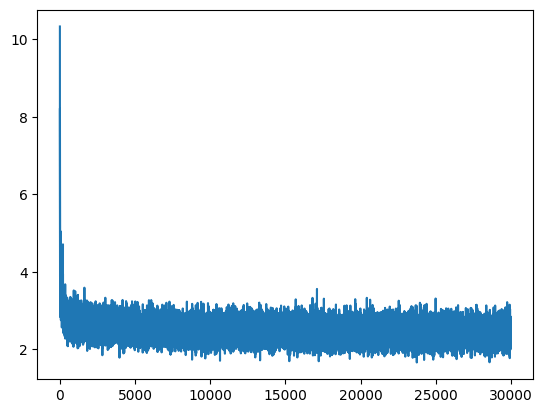

In [118]:
plt.plot(step_i,loss_i)

In [121]:
embd = Tb[X_train]
th = torch.tanh(embd.view(-1,6) @ Wgt_1 + bias_1)
logits = th @ Wgt_2 + bias_2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.4066, grad_fn=<NllLossBackward0>)

In [122]:
embd = Tb[X_val]
th = torch.tanh(embd.view(-1,6) @ Wgt_1 + bias_1)
logits = th @ Wgt_2 + bias_2
loss = F.cross_entropy(logits, Y_val)
loss

tensor(2.6659, grad_fn=<NllLossBackward0>)

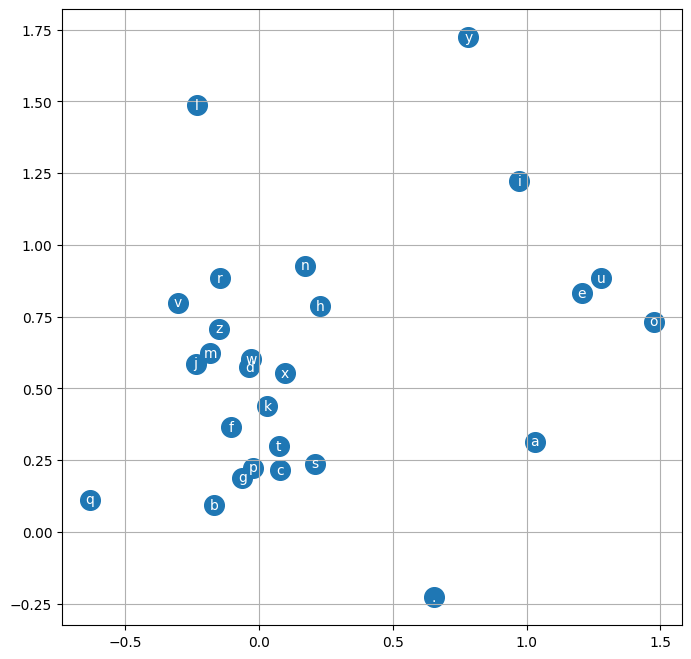

In [123]:
plt.figure(figsize = (8,8))
plt.scatter(Tb[:,0].data,Tb[:,1].data, s= 200)
for i in range(Tb.shape[0]):
  plt.text(Tb[i,0].item(),Tb[i,1].item(),int_to_char[i], ha = "center", va= "center",color = 'white')
plt.grid('minor')

In [ ]:
---- more than 2 dimensions

In [124]:
g = torch.Generator().manual_seed(2147483647)
Tb = torch.rand((27,10), generator = g)
Wgt_1 = torch.randn((30,200),generator = g )
bias_1 = torch.randn((200), generator = g)
Wgt_2 = torch.randn((200,27), generator = g)
bias_2 = torch.randn((27), generator = g)
parameters = [Tb,Wgt_1,bias_1,Wgt_2,bias_2]

In [125]:
sum(p.nelement() for p in parameters)

11897

In [126]:
for p in parameters:
  p.requires_grad = True

In [127]:
learning_rate = []
loss_i = []
step_i = []


In [136]:

# forward pass
for i in range(30000):
  idx = torch.randint(0, X_train.shape[0],(32,))
  embd = Tb[X_train[idx]]
  th = torch.tanh(embd.view(-1,30) @ Wgt_1 + bias_1)
  logits = th @ Wgt_2 + bias_2
  loss = F.cross_entropy(logits, Y_train[idx])
  #print(loss.item())
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  #lr = lrs[i]
  lr = 0.1
  for p in parameters:
    p.data += -lr * p.grad
  #learning_rate.append(lr)
  loss_i.append(loss.log10().item())
  step_i.append(i)

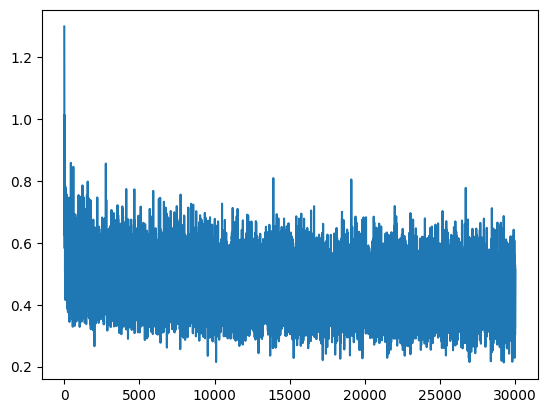

In [131]:
plt.plot(step_i, loss_i)

In [137]:
embd = Tb[X_train]
th = torch.tanh(embd.view(-1,30) @ Wgt_1 + bias_1)
logits = th @ Wgt_2 + bias_2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.2809, grad_fn=<NllLossBackward0>)

In [134]:
embd = Tb[X_val]
th = torch.tanh(embd.view(-1,30) @ Wgt_1 + bias_1)
logits = th @ Wgt_2 + bias_2
loss = F.cross_entropy(logits, Y_val)
loss

tensor(2.8482, grad_fn=<NllLossBackward0>)

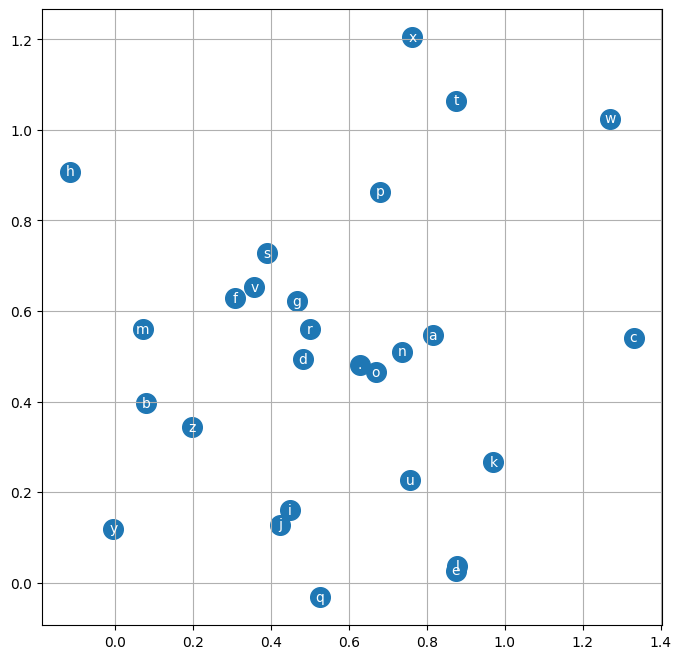

In [138]:
plt.figure(figsize = (8,8))
plt.scatter(Tb[:,0].data,Tb[:,1].data, s= 200)
for i in range(Tb.shape[0]):
  plt.text(Tb[i,0].item(),Tb[i,1].item(),int_to_char[i], ha = "center", va= "center",color = 'white')
plt.grid('minor')

In [142]:
for _ in range(30):
  output = []
  context = [0] * block_size
  while True:
    embd = Tb[torch.tensor([context])]
    th = torch.tanh(embd.view(1,-1) @ Wgt_1 + bias_1)
    logits = th @ Wgt_2 + bias_2
    probs = F.softmax(logits, dim = 1)
    idx = torch.multinomial(probs, num_samples = 1, generator = g).item()
    context = context[1:] + [idx]
    output.append(idx)
    if idx ==0:
      break

  print(''.join(int_to_char[i] for i in output))


beyleencley.
konsees.
madwa.
caeler.
adeirlea.
lilah.
maisee.
nolelanda.
dee.
jalee.
lemelex.
brison.
calke.
aleen.
aedexiee.
mil.
leonnee.
nalexlee.
haeshao.
davanleighmerden.
mileuguur.
ilabelit.
abellea.
daela.
ella.
navolberlet.
aleliseel.
zef.
jene.
elieerrelle.
